In [1]:
import os
import zipfile
from os import listdir
from matplotlib import image
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import top_k_categorical_accuracy


In [2]:
from google.colab import drive
drive.mount('Mydrive')

Mounted at Mydrive


In [3]:
pwd

'/content'

#Unzip the dataset and define few preprocessing steps

In [4]:
local_zip = '/content/Mydrive/MyDrive/Colab Notebooks/AML_Project/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

local_zip = '/content/Mydrive/MyDrive/Colab Notebooks/AML_Project/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Define a normalization function

In [5]:
IMG_SIZE = 160
IMG_SIZE_ARRAY = (160, 160)
def _normalize_img(img):
    img = tf.cast(img, tf.float32)/255.   # All images will be rescaled by 1./255
    img = tf.image.resize(img,  (IMG_SIZE, IMG_SIZE), method= 'bilinear')
    return (img)


Create array list storing image paths and labels

In [6]:
train_info = '/content/Mydrive/MyDrive/Colab Notebooks/AML_Project/train.txt'
with open(train_info) as txt_file:
  lines = [x.strip() for x in txt_file.readlines()]
def TrainImageAndLabel():
  data = []
  for x in lines:
      temp = x.split(' ')
      aa = image.imread('/tmp/' + temp[0])
      aa = _normalize_img(aa)
      data.append([aa,int(temp[1])])
  return data

train_data = TrainImageAndLabel()

In [7]:
x_train = []
y_train = []
for x,y in train_data:
  x_train.append(x)
  y_train.append(y)


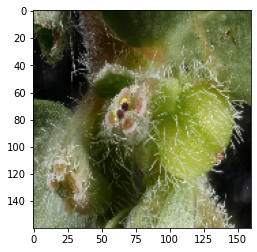

131736


In [8]:
plt.imshow(x_train[300])
plt.show()
print(y_train[300])

In [9]:
test_info = '/content/Mydrive/MyDrive/Colab Notebooks/AML_Project/groundtruth.txt'
with open(test_info) as txt_file:
  lines = [x.strip() for x in txt_file.readlines()]
def TestImageAndLabel():
  data = []
  for x in lines:
      temp = x.split(' ')
      aa = image.imread('/tmp/' + temp[0])
      aa = _normalize_img(aa)
      data.append([aa,int(temp[1])])
  return data

test_data = TestImageAndLabel()

In [10]:
x_test = []
y_test = []
for x,y in test_data:
  x_test.append(x)
  y_test.append(y)


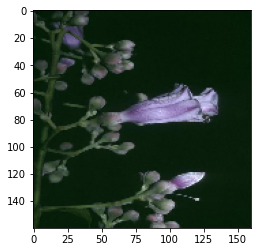

105951


In [11]:
plt.imshow(x_test[0])
plt.show()
print(y_test[0])

In [12]:
x_train =  np.array(x_train)
x_test = np.array(x_test)



In [13]:
train_label = np.unique(y_train)
no_classes = train_label.size
print(no_classes)
def changeLabel():
  i=0;
  label = []
  for temp in train_label:
    label.append([temp,i])
    i += 1
  return label

new_label = changeLabel()

print(new_label)


100
[[12254, 0], [12518, 1], [12910, 2], [12922, 3], [13276, 4], [13325, 5], [13330, 6], [13370, 7], [14353, 8], [14401, 9], [15014, 10], [15318, 11], [15330, 12], [15355, 13], [19165, 14], [19489, 15], [29686, 16], [105951, 17], [106023, 18], [106387, 19], [106461, 20], [106466, 21], [110432, 22], [116853, 23], [119986, 24], [120497, 25], [121836, 26], [121841, 27], [125412, 28], [126895, 29], [127007, 30], [127097, 31], [127151, 32], [127242, 33], [129645, 34], [130657, 35], [131079, 36], [131736, 37], [132107, 38], [132113, 39], [132431, 40], [132476, 41], [132501, 42], [133595, 43], [133617, 44], [136761, 45], [138662, 46], [140367, 47], [141068, 48], [141332, 49], [141336, 50], [142550, 51], [142736, 52], [143496, 53], [143706, 54], [143758, 55], [144394, 56], [145020, 57], [148220, 58], [148977, 59], [149264, 60], [149682, 61], [149919, 62], [150135, 63], [151469, 64], [151593, 65], [156516, 66], [156526, 67], [158341, 68], [158592, 69], [158653, 70], [158736, 71], [158793, 72], 

In [14]:
i =0;
for label in y_train:
  for x,y in new_label:
    if(label == x):
      y_train[i] = y
      break
  i += 1

print(y_train)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 3

In [15]:
j =0;
for label in y_test:
  for x,y in new_label:
    if(label == x):
      y_test[j] = y
      break
  j += 1

print(y_test)

[17, 19, 23, 24, 25, 27, 28, 29, 30, 33, 35, 39, 4, 5, 45, 49, 50, 54, 55, 9, 57, 58, 60, 61, 10, 65, 12, 74, 75, 76, 20, 20, 20, 1, 1, 1, 32, 32, 32, 2, 2, 2, 3, 3, 36, 36, 36, 37, 37, 37, 40, 40, 40, 43, 43, 43, 44, 44, 44, 7, 7, 7, 46, 46, 46, 66, 66, 66, 68, 68, 68, 70, 70, 70, 71, 71, 71, 73, 73, 73, 78, 78, 78, 80, 80, 80, 82, 82, 82, 83, 83, 83, 84, 84, 84, 85, 85, 85, 86, 86, 86, 87, 87, 87, 88, 88, 88, 14, 14, 14, 89, 89, 90, 90, 90, 15, 15, 15, 91, 91, 91, 92, 92, 93, 93, 93, 94, 94, 94, 95, 95, 95, 96, 96, 96, 97, 97, 97, 98, 98, 98, 99, 99, 99, 16, 16, 16, 18, 18, 21, 21, 22, 22, 26, 26, 0, 0, 31, 31, 34, 34, 38, 38, 41, 41, 42, 42, 6, 6, 47, 47, 48, 48, 51, 51, 52, 52, 53, 53, 8, 8, 56, 56, 59, 59, 62, 62, 63, 63, 64, 64, 11, 11, 13, 13, 67, 67, 69, 69, 72, 72, 77, 77, 79, 79, 81, 81]


In [16]:
y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [17]:
print("Shape of X_train : ", x_train.shape)
print("Shape of X_test : ", x_test.shape)

Shape of X_train :  (4744, 160, 160, 3)
Shape of X_test :  (207, 160, 160, 3)


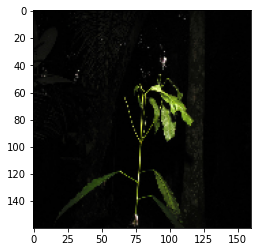

In [18]:
random_value = random.randint(0, len(x_train))

plt.imshow(x_train[random_value, :])
plt.show()

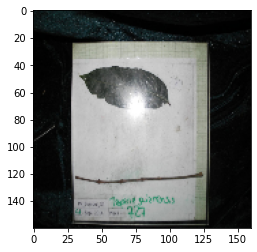

In [19]:
plt.imshow(x_train[200, :])
plt.show()

In [20]:
print(y_train[200])

3


### CNN architecture

In [21]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [22]:
# Normalization 
# Mobile net due with small data, quite good 

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [23]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE_ARRAY + (3,)

In [24]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [25]:
base_model.trainable = False

In [26]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [27]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [28]:
prediction_layer = tf.keras.layers.Dense(no_classes)

In [29]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [30]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 100)               128100    
                                                                 
Total params: 2,386,084
Trainable params: 128,100
Non-trainab

In [32]:
len(model.trainable_variables)

2

In [33]:
loss0, accuracy0 = model.evaluate(x_test, y_test)

7/7 [==============================] - 9s 68ms/step - loss: 5.2131 - accuracy: 0.0193


In [34]:
initial_epochs = 20
history = model.fit(x_train, y_train,
                    epochs=initial_epochs,
                    batch_size = 64, validation_data=(x_test,y_test))

Epoch 1/20
75/75 [==============================] - 7s 51ms/step - loss: 5.3809 - accuracy: 0.0101 - val_loss: 5.1226 - val_accuracy: 0.0145
Epoch 2/20
75/75 [==============================] - 4s 47ms/step - loss: 5.2466 - accuracy: 0.0114 - val_loss: 5.0531 - val_accuracy: 0.0193
Epoch 3/20
75/75 [==============================] - 4s 47ms/step - loss: 5.1691 - accuracy: 0.0124 - val_loss: 4.9956 - val_accuracy: 0.0193
Epoch 4/20
75/75 [==============================] - 4s 47ms/step - loss: 5.0921 - accuracy: 0.0124 - val_loss: 4.9487 - val_accuracy: 0.0193
Epoch 5/20
75/75 [==============================] - 4s 47ms/step - loss: 5.0125 - accuracy: 0.0175 - val_loss: 4.9085 - val_accuracy: 0.0193
Epoch 6/20
75/75 [==============================] - 4s 47ms/step - loss: 4.9355 - accuracy: 0.0148 - val_loss: 4.8745 - val_accuracy: 0.0193
Epoch 7/20
75/75 [==============================] - 4s 53ms/step - loss: 4.8889 - accuracy: 0.0177 - val_loss: 4.8444 - val_accuracy: 0.0193
Epoch 8/20
75

In [35]:
#Get the training model parameters
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

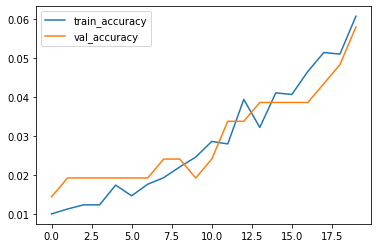

In [36]:
#Generate a accuracy graph
plt.plot(history.epoch, history.history.get("accuracy"), label = "train_accuracy")
plt.plot(history.epoch, history.history.get("val_accuracy"), label = "val_accuracy")
plt.legend()

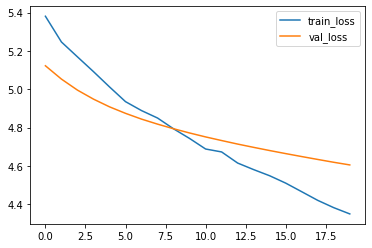

In [37]:
#Generate a loss graph
plt.plot(history.epoch, history.history.get("loss"), label = "train_loss")
plt.plot(history.epoch, history.history.get("val_loss"), label = "val_loss")
plt.legend()

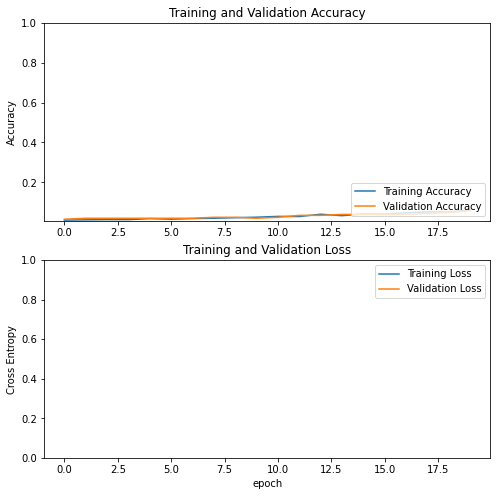

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [39]:
base_model.trainable = True

In [40]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [41]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 100)               128100    
                                                                 
Total params: 2,386,084
Trainable params: 1,989,540
Non-train

In [43]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(x_train, y_train,
                    epochs=total_epochs,
                    initial_epoch=history.epoch[-1],
                    batch_size = 64,
                    validation_data=(x_test,y_test))

Epoch 20/40
75/75 [==============================] - 12s 81ms/step - loss: 4.3148 - accuracy: 0.0601 - val_loss: 4.5772 - val_accuracy: 0.0628
Epoch 21/40
75/75 [==============================] - 5s 68ms/step - loss: 4.2490 - accuracy: 0.0694 - val_loss: 4.5601 - val_accuracy: 0.0580
Epoch 22/40
75/75 [==============================] - 5s 72ms/step - loss: 4.1895 - accuracy: 0.0780 - val_loss: 4.5490 - val_accuracy: 0.0531
Epoch 23/40
75/75 [==============================] - 5s 69ms/step - loss: 4.1687 - accuracy: 0.0841 - val_loss: 4.5392 - val_accuracy: 0.0531
Epoch 24/40
75/75 [==============================] - 5s 69ms/step - loss: 4.1289 - accuracy: 0.0833 - val_loss: 4.5292 - val_accuracy: 0.0580
Epoch 25/40
75/75 [==============================] - 5s 69ms/step - loss: 4.0986 - accuracy: 0.0843 - val_loss: 4.5193 - val_accuracy: 0.0628
Epoch 26/40
75/75 [==============================] - 5s 69ms/step - loss: 4.0653 - accuracy: 0.0911 - val_loss: 4.5108 - val_accuracy: 0.0676
Epoch

In [44]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

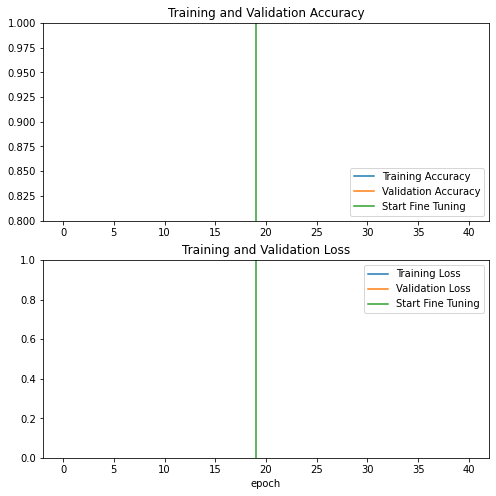

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [46]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy :', accuracy)

7/7 [==============================] - 0s 24ms/step - loss: 4.4309 - accuracy: 0.0966
Test accuracy : 0.09661835432052612
